In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy as sp

%matplotlib inline
plt.rcParams["figure.figsize"] = (4.8, 3.2)


In [56]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 使用 style 来配置 pyplot 风格

style 是 pyplot 的一个子模块，方便进行风格转换， pyplot 有很多的预设风格，可以使用 plt.style.available 来查看：

In [57]:
plt.style.available[0:2]

['Solarize_Light2', '_classic_test_patch']

一般不希望改变全局的风格，使用 context 将风格改变限制在某一个代码块内：

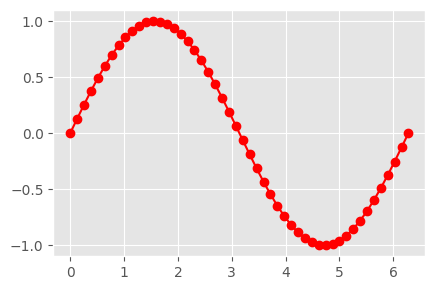

In [58]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
with plt.style.context(("ggplot")):
    plt.plot(x, y, "r-o")
    plt.show()

### x轴的标签45度倾斜

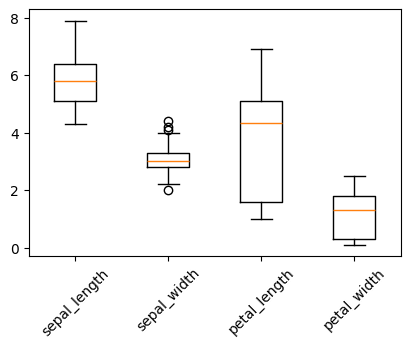

In [59]:
plt.boxplot(iris.drop(["species"], axis=1), tick_labels=iris.columns[:-1])
plt.xticks(rotation=45)
plt.show()

### 用scipy画Q-Q图检测数据分布是否符合某分布分布

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

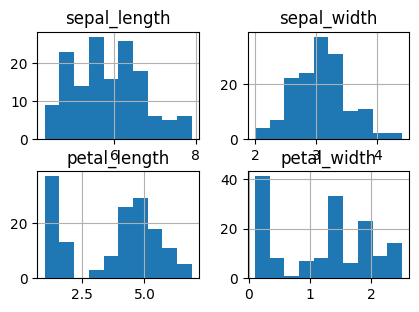

In [60]:
iris.hist()

Q-Q 图通过比较数据和正太分布的**分位数**是否相等来判断数据是否服从正太分布。如下图蓝色的点与红色的线越近，说明数据更符合正太分布。

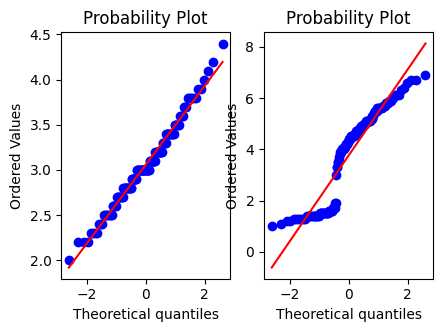

In [61]:
plt.subplot(1, 2, 1)
scipy.stats.probplot(iris["sepal_width"], dist="norm", plot=plt)
plt.subplot(1, 2, 2)
scipy.stats.probplot(iris["petal_length"], dist="norm", plot=plt)
plt.show()

### 绘制数据的相关图

<Axes: >

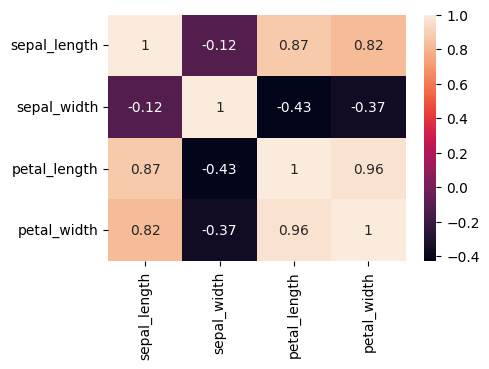

In [62]:
cor = iris.drop("species", axis=1).corr()
sns.heatmap(cor, annot=True)

### 等高线图

用`np.meshgrid`生成坐标矩阵

((64, 64), (64, 64))

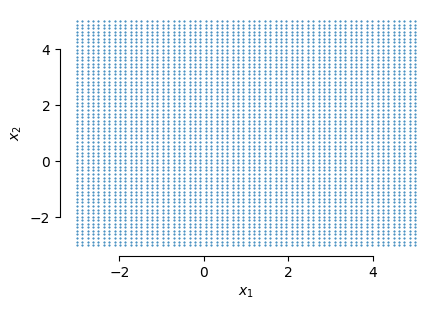

In [63]:
x = np.linspace(-3, 5, 64)
y = np.linspace(-3, 5, 64)

xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots()
ax.plot(xx.flatten(), yy.flatten(), ".", markersize=1)
sns.despine(trim=True)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")

xx.shape, yy.shape

用`plt.contourf`轮廓图

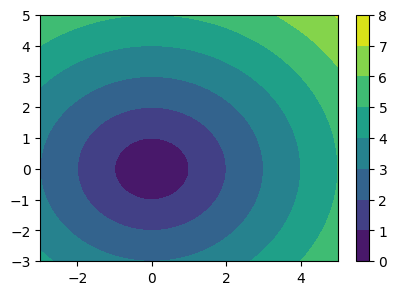

In [64]:
zz = np.sqrt(xx**2 + yy**2)
h = plt.contourf(xx, yy, zz)
_ = plt.colorbar(h)

用`plt.contourf`轮廓图：（密度函数的等高线）来展示函数的分布

In [65]:
X_rv = sp.stats.multivariate_normal(mean=[1.0, 2.0], cov=np.diag([1.0, 1.0]))

In [70]:
X_flat = np.hstack([xx.flatten()[:, None], yy.flatten()[:, None]])
z = X_rv.pdf(X_flat)
Z = z.reshape((64, 64))

X_flat.shape, z.shape

((4096, 2), (4096,))

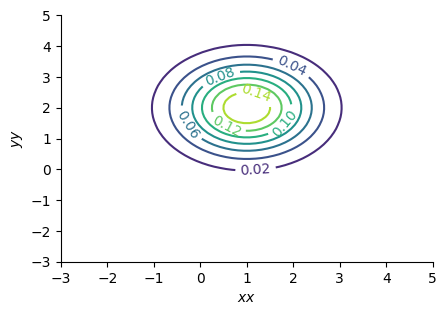

In [72]:
fig, ax = plt.subplots()
c = ax.contour(xx, yy, Z, levels=8)
ax.clabel(c, inline=1, fontsize=10)
ax.set_xlabel("$xx$")
ax.set_ylabel("$yy$")
sns.despine(trim=True)

### 柱状图：对比两组实验结果

 A bar plot shows comparisons among discrete categories. 

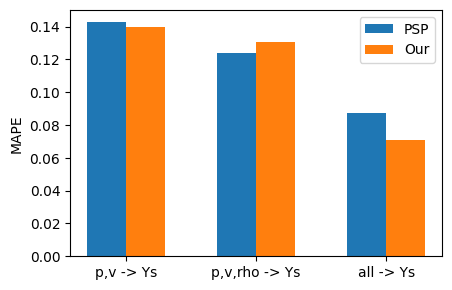

In [27]:
y_our = [0.13987, 0.13038, 0.07105]
y_psp = [0.1431, 0.1237, 0.0871]

bar_width = 0.3
x = np.arange(len(y_our))

plt.bar(x, y_psp, bar_width, label="PSP")
plt.bar(x + bar_width, y_our, bar_width, label="Our")

plt.ylabel("MAPE")
plt.xticks(x + bar_width / 2, ["p,v -> Ys", "p,v,rho -> Ys", "all -> Ys"])
plt.legend()
plt.show()

用 pandas 更方便

Text(0, 0.5, 'MAPE')

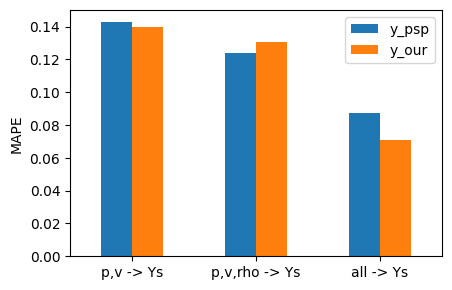

In [29]:
y_our = [0.13987, 0.13038, 0.07105]
y_psp = [0.1431, 0.1237, 0.0871]
index = ["p,v -> Ys", "p,v,rho -> Ys", "all -> Ys"]
df = pd.DataFrame({"y_psp": y_psp, "y_our": y_our}, index=index)
ax = df.plot.bar(rot=0)
ax.set_ylabel("MAPE")